In [14]:
import pandas as pd
data = pd.read_csv("firewall_data.csv")
data.head()

Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   

  Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  \
0  allow    177          94              83        2                  30   
1  allow   4768        1600            3168       19                  17   
2  allow    238         118             120        2                1199   
3  allow   3327        1438            1889       15                  17   
4  allow  25358        6778           18580       31                  16   

   pkts_sent  pkts_received  
0          1              1  
1         10              9  
2          1              1  
3          8              7  
4         13             18

In [15]:
print(data.shape)
data['Action'].unique()

(65532, 12)


array(['allow', 'drop', 'deny', 'reset-both'], dtype=object)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [17]:
data.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [18]:
duplicate_rows = data[data.duplicated()]
# Print duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
       Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
268          21268             62609                0                     0   
351          48706             23393                0                     0   
593          65003             57470                0                     0   
632            443             49988                0                     0   
661          10669             49756                0                     0   
...            ...               ...              ...                   ...   
65517        54874               445                0                     0   
65519        49784               445                0                     0   
65521        42995             26467                0                     0   
65522        53314             64097                0                     0   
65531        54867               445                0                     0   

      Action  Bytes  Bytes Sent  By

In [19]:
import pandas as pd
# Remove duplicate rows
data= data.drop_duplicates()

# Print the DataFrame after removing duplicates
print("After removing duplicates")
print(data)

After removing duplicates
       Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0            57222                53            54587                    53   
1            56258              3389            56258                  3389   
2             6881             50321            43265                 50321   
3            50553              3389            50553                  3389   
4            50002               443            45848                   443   
...            ...               ...              ...                   ...   
65526        51710             43069            65147                 43069   
65527        63691                80            13237                    80   
65528        50964                80            13485                    80   
65529        54871               445                0                     0   
65530        54870               445                0                     0   

      Action    Bytes  By

In [20]:
class_counts = data['Action'].value_counts()

# Print the number of rows for each class
print("Number of rows for each class:")
for class_label, count in class_counts.items():
    print(f"Class {class_label}: {count}")

Number of rows for each class:
Class allow: 37439
Class drop: 11635
Class deny: 8042
Class reset-both: 54


In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the preprocessed dataset
#data = pd.read_csv('firewall_internet_data.csv')

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Action' column
data['Action_encoded'] = label_encoder.fit_transform(data['Action'])

# Print the mapping of encoded values to their respective classes
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:", label_mapping)

# Count and print the number of rows for each class in the 'Action_encoded' column
class_counts = data['Action_encoded'].value_counts()
print("\nNumber of rows for each class:")
for class_label, count in class_counts.items():
    print(f"Class {class_label} ({list(label_mapping.keys())[list(label_mapping.values()).index(class_label)]}): {count} rows")

# Drop the original 'Action' column
data.drop(columns=['Action'], inplace=True)

# Verify the updated dataset
print("\nUpdated Columns:", data.columns)
print(data.head())


Label Mapping: {'allow': 0, 'deny': 1, 'drop': 2, 'reset-both': 3}

Number of rows for each class:
Class 0 (allow): 37439 rows
Class 2 (drop): 11635 rows
Class 1 (deny): 8042 rows
Class 3 (reset-both): 54 rows

Updated Columns: Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received',
       'Packets', 'Elapsed Time (sec)', 'pkts_sent', 'pkts_received',
       'Action_encoded'],
      dtype='object')
   Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   

   Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  pkt

In [25]:
# Separate class 3 (reset-both) from other classes
class_3_data = data[data['Action_encoded'] == 3]
other_classes_data = data[data['Action_encoded'] != 3]

# Display the number of rows for each class to confirm separation
print(f"Rows for Class 3 (reset-both): {len(class_3_data)}")
print(f"Rows for other classes: {len(other_classes_data)}")


Rows for Class 3 (reset-both): 54
Rows for other classes: 57116


In [27]:
# Check how many samples exist for class 3
print(f"Number of samples for class 3 (reset-both): {len(class_3_data)}")


Number of samples for class 3 (reset-both): 54


In [29]:
# Check number of rows in class 3
print(f"Number of rows in class 3: {len(class_3_data)}")

# Check unique values in the target variable for class 3
print(f"Unique values in 'Action_encoded' for class 3 data: {class_3_data['Action_encoded'].unique()}")


Number of rows in class 3: 54
Unique values in 'Action_encoded' for class 3 data: [3]


In [34]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Separate the original dataset into class 3 and class 1 data
class_3_data = data[data['Action_encoded'] == 3]
class_1_data = data[data['Action_encoded'] == 1]

# Separate features and target for class 3 and class 1
X_class_3 = class_3_data.drop('Action_encoded', axis=1)
y_class_3 = class_3_data['Action_encoded']

X_class_1 = class_1_data.drop('Action_encoded', axis=1)
y_class_1 = class_1_data['Action_encoded']


In [35]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to class 1 and class 3 to generate more samples
X_combined = pd.concat([X_class_3, X_class_1], axis=0)
y_combined = pd.concat([y_class_3, y_class_1], axis=0)

X_resampled, y_resampled = smote.fit_resample(X_combined, y_combined)

# Check the number of samples after SMOTE
print(f"Number of samples after SMOTE: {len(X_resampled)}")



Number of samples after SMOTE: 16084


In [36]:
# Separate the resampled data back into class 3 and class 1
X_class_3_resampled = X_resampled[y_resampled == 3]
y_class_3_resampled = y_resampled[y_resampled == 3]

X_class_1_resampled = X_resampled[y_resampled == 1]
y_class_1_resampled = y_resampled[y_resampled == 1]

# Verify the new number of samples in each class
print(f"Number of samples in class 3 after SMOTE: {len(X_class_3_resampled)}")
print(f"Number of samples in class 1 after SMOTE: {len(X_class_1_resampled)}")


Number of samples in class 3 after SMOTE: 8042
Number of samples in class 1 after SMOTE: 8042


In [37]:
# Combine the resampled class 3 and class 1 with the other classes
class_0_data = data[data['Action_encoded'] == 0]
class_2_data = data[data['Action_encoded'] == 2]

X_class_0 = class_0_data.drop('Action_encoded', axis=1)
y_class_0 = class_0_data['Action_encoded']

X_class_2 = class_2_data.drop('Action_encoded', axis=1)
y_class_2 = class_2_data['Action_encoded']

# Combine all classes back together
X_balanced = pd.concat([X_class_0, X_class_2, X_class_1_resampled, X_class_3_resampled], axis=0)
y_balanced = pd.concat([y_class_0, y_class_2, y_class_1_resampled, y_class_3_resampled], axis=0)

# Shuffle the dataset to mix the samples
balanced_data = pd.concat([X_balanced, y_balanced], axis=1)
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the features and target again
X_balanced = balanced_data.drop('Action_encoded', axis=1)
y_balanced = balanced_data['Action_encoded']

# Verify the final class distribution
print("\nClass distribution after SMOTE:")
print(y_balanced.value_counts())



Class distribution after SMOTE:
Action_encoded
0    37439
2    11635
1     8042
3     8042
Name: count, dtype: int64


Feature Importances:
NAT Source Port         0.358358
Destination Port        0.257695
Source Port             0.113921
NAT Destination Port    0.103525
Bytes Sent              0.046908
Elapsed Time (sec)      0.045148
Bytes                   0.044900
pkts_received           0.010080
Packets                 0.007440
pkts_sent               0.006475
Bytes Received          0.005550
dtype: float64


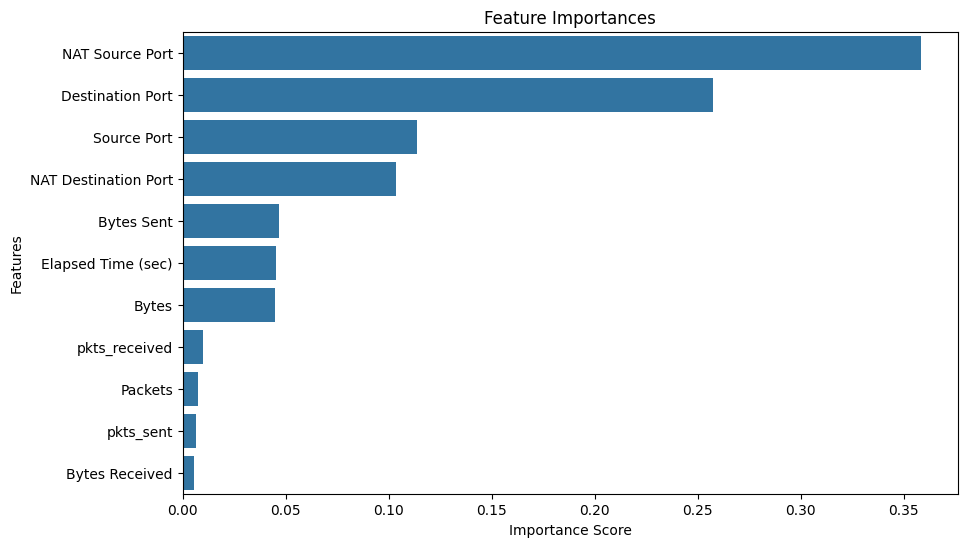

Selected Features: Index(['NAT Source Port', 'Destination Port', 'Source Port',
       'NAT Destination Port', 'Bytes Sent', 'Elapsed Time (sec)', 'Bytes'],
      dtype='object')


In [38]:
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the balanced dataset after SMOTE
X_balanced = balanced_data.drop('Action_encoded', axis=1)  # Features
y_balanced = balanced_data['Action_encoded']  # Target column

# Initialize ExtraTreesClassifier for feature importance
model = ExtraTreesClassifier(random_state=42)
model.fit(X_balanced, y_balanced)  # Fit on the balanced dataset

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X_balanced.columns)
sorted_importances = feature_importances.sort_values(ascending=False)

# Display feature importances
print("Feature Importances:")
print(sorted_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances.values, y=sorted_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Select top features based on importance (adjust the threshold)
selected_features = sorted_importances[sorted_importances > 0.03].index  # Adjust threshold
X_selected = X_balanced[selected_features]  # Use only selected features
print("Selected Features:", selected_features)


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Use the balanced dataset after SMOTE and feature selection
X_selected = X_balanced[['NAT Source Port', 'Destination Port','Source Port', 'NAT Destination Port',  'Bytes Sent', 'Elapsed Time (sec)','Bytes']]  # Selected features
y_balanced = balanced_data['Action_encoded']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42, class_weight='balanced')


# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Print the detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7051
Precision: 0.7901
Recall: 0.7051
F1-Score: 0.7157

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     11232
           1       0.62      0.47      0.54      2413
           2       0.50      1.00      0.66      3490
           3       0.54      0.64      0.59      2413

    accuracy                           0.71     19548
   macro avg       0.66      0.70      0.65     19548
weighted avg       0.79      0.71      0.72     19548



In [48]:
# Combine the resampled data (class 1 and class 3) with the other classes
X_class_0 = data[data['Action_encoded'] == 0].drop('Action_encoded', axis=1)
y_class_0 = data[data['Action_encoded'] == 0]['Action_encoded']
X_class_2 = data[data['Action_encoded'] == 2].drop('Action_encoded', axis=1)
y_class_2 = data[data['Action_encoded'] == 2]['Action_encoded']

# Concatenate resampled class 1 and class 3 with the other classes
X_resampled = pd.concat([X_class_0, X_class_2, X_class_1_resampled, X_class_3_resampled], axis=0)
y_resampled = pd.concat([y_class_0, y_class_2, y_class_1_resampled, y_class_3_resampled], axis=0)

# Combine X and y for the final resampled dataset
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

# Display the head of the resampled dataset
print(resampled_data.head())

# Save the resampled dataset as a CSV file
resampled_data.to_csv('resampled_data.csv', index=False)


   Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   

   Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  pkts_sent  \
0    177          94              83        2                  30          1   
1   4768        1600            3168       19                  17         10   
2    238         118             120        2                1199          1   
3   3327        1438            1889       15                  17          8   
4  25358        6778           18580       31                  16         13   

   pkts_received  Action_encoded  
0              1               0 